TASK 1 : BREAST CANCER PREDICTION USING SVM ALGORITHM

Loading Python Libraries and Breast Cancer Dataset


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer['DESCR'])
print(cancer['target'])
print(cancer['target_names'])
print(cancer['feature_names'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Visualize the relationship between our features


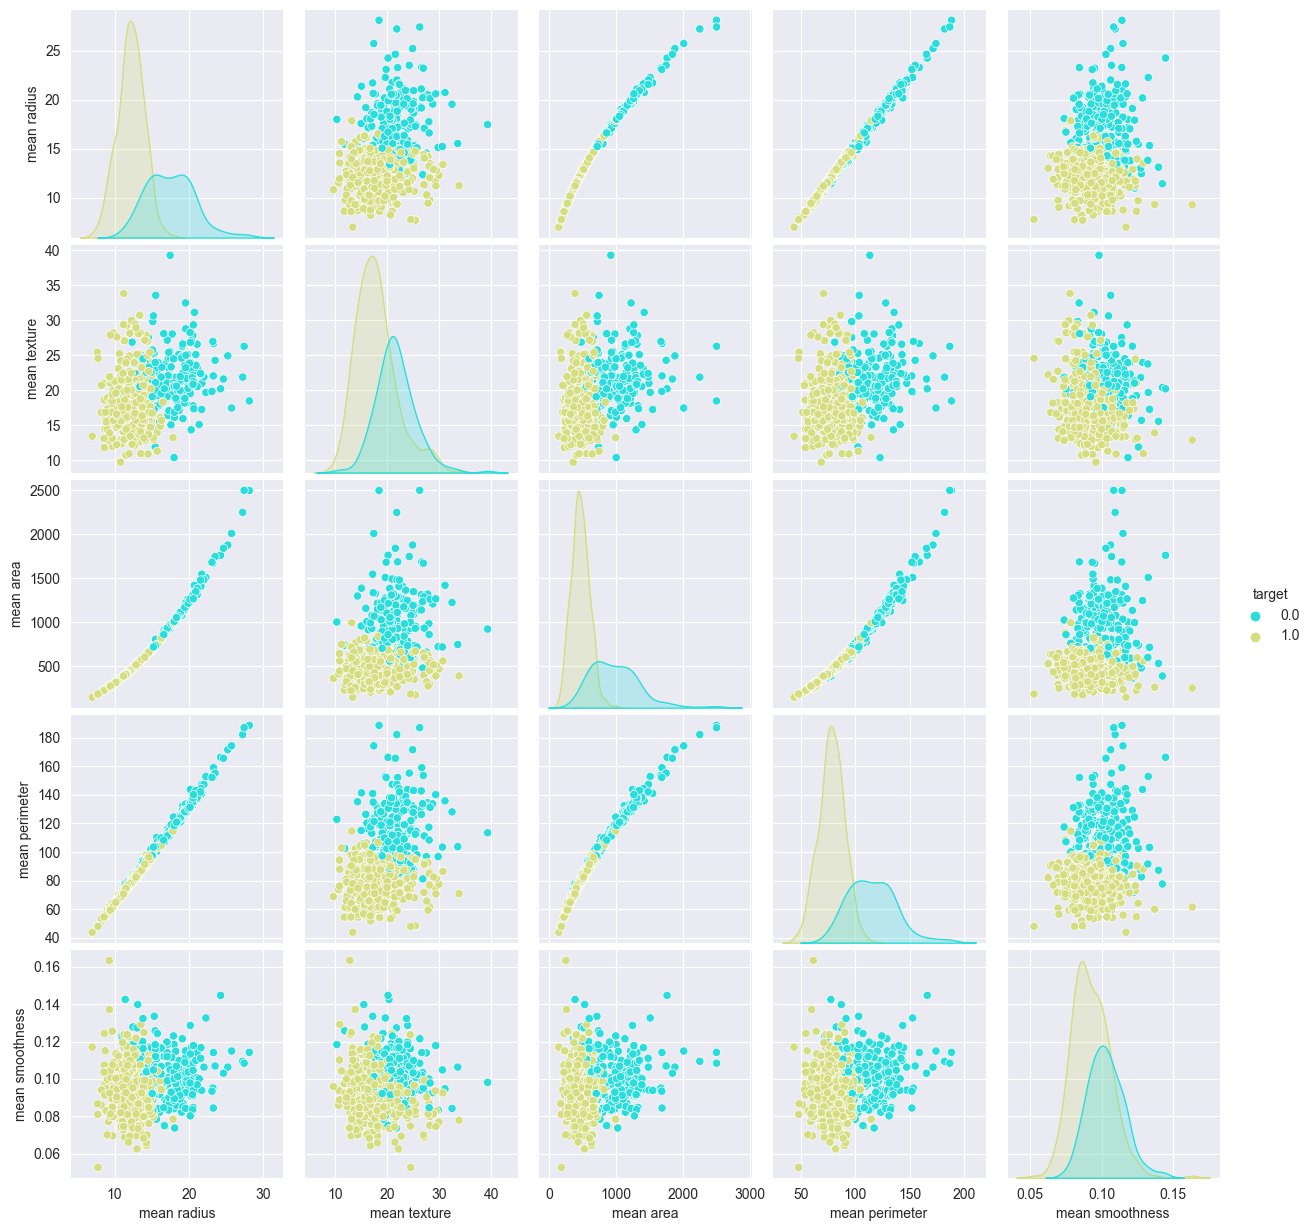

In [10]:
df = pd.DataFrame(np.c_ [cancer['data'],cancer['target']], columns=np.append (cancer['feature_names'],['target']))
df.head()
sns.set_style('darkgrid')
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'],palette='rainbow')

<Axes: ylabel='count'>

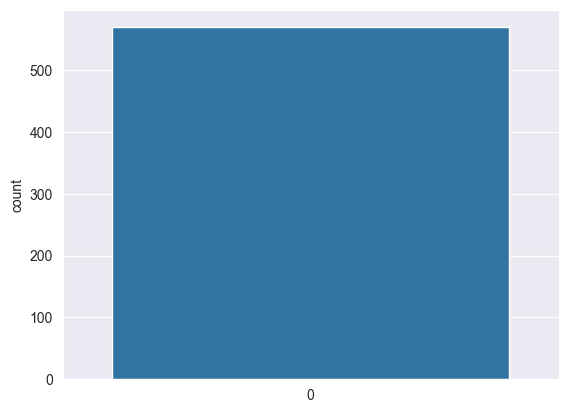

In [12]:
sns.countplot(df['target'])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

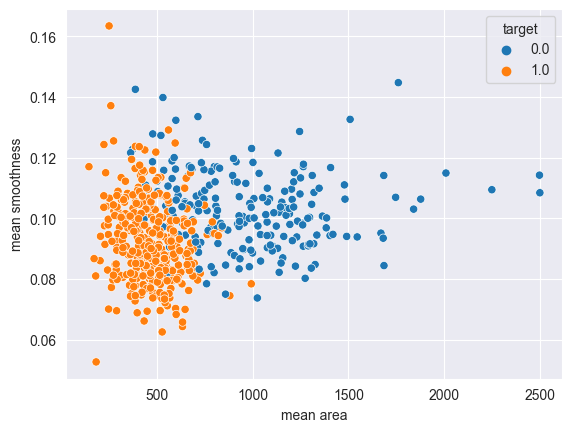

In [13]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df)

Correlation between our features

<Axes: >

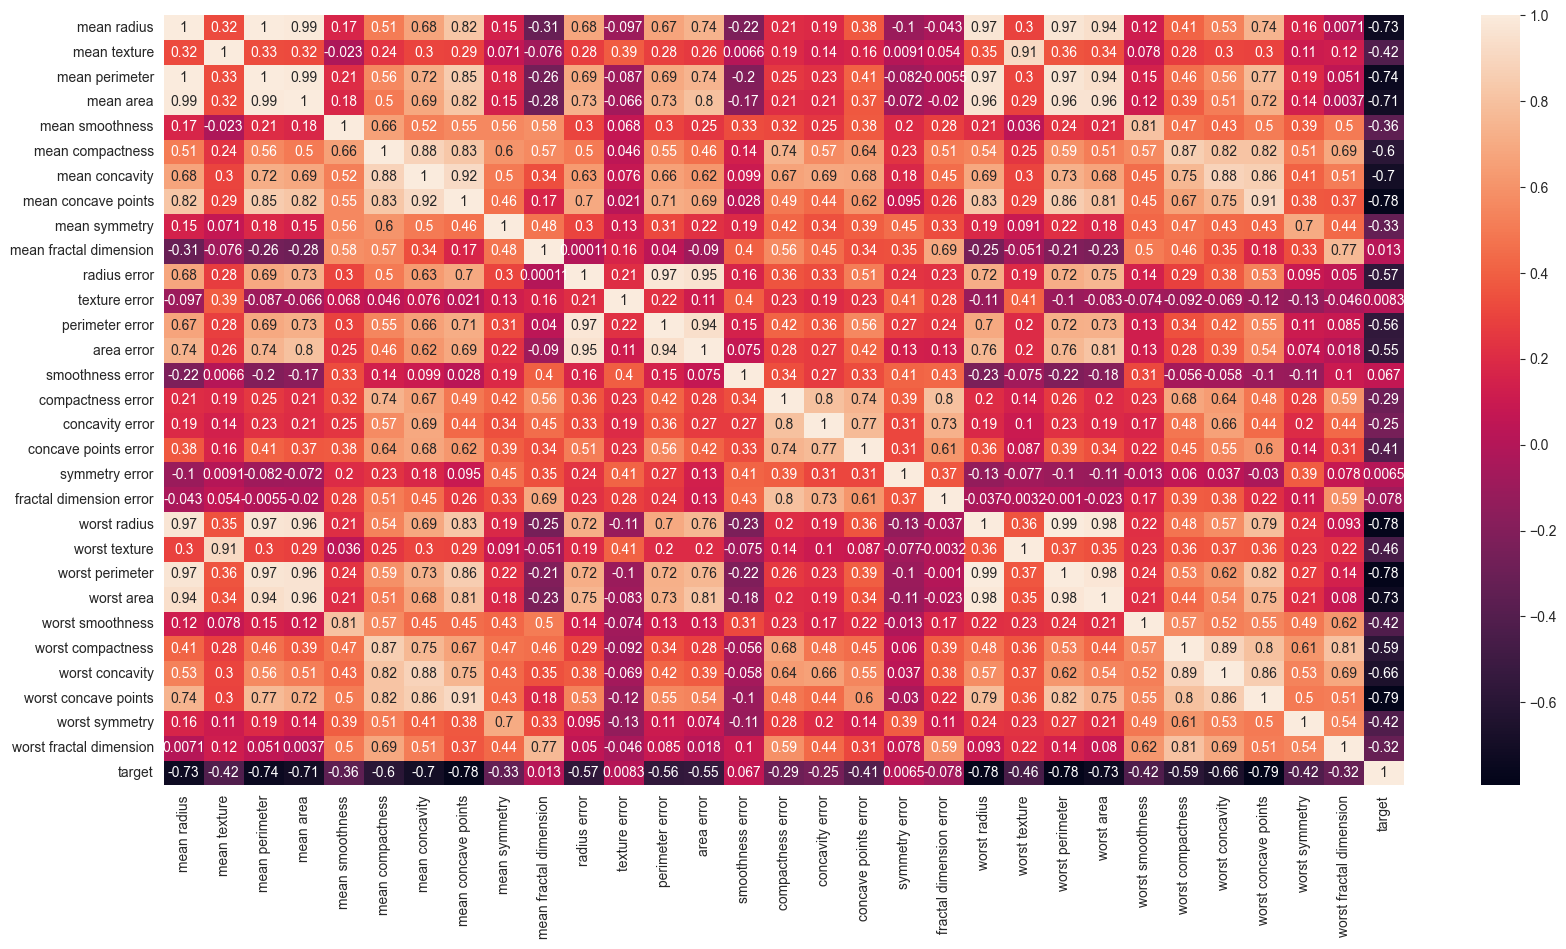

In [14]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot= True)

Model Training

In [15]:
X = df.drop(['target'], axis = 1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y = df['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Import Support Vector Machine (SVM) Model

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
y_test

204    1.0
70     0.0
131    0.0
431    1.0
540    1.0
      ... 
486    1.0
75     0.0
249    1.0
238    1.0
265    0.0
Name: target, Length: 114, dtype: float64

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
SVC_model = SVC()
SVC_model.fit(X_train,y_train)

SVC()

Our trained model is used to make a prediction using the testing data

In [19]:
y_predict = SVC_model.predict(X_test)
y_predict

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

Confusion matrix for our classifier’s performance on the test dataset.

<Axes: >

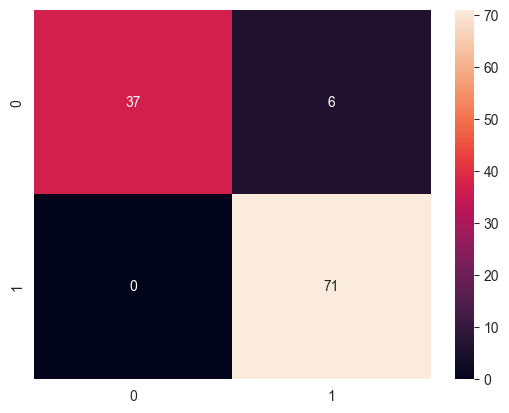

In [20]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True )

Normalize Training Data

In [21]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
x_train_Scaled = (X_train - min_train)/range_train

<Axes: xlabel='mean area', ylabel='mean smoothness'>

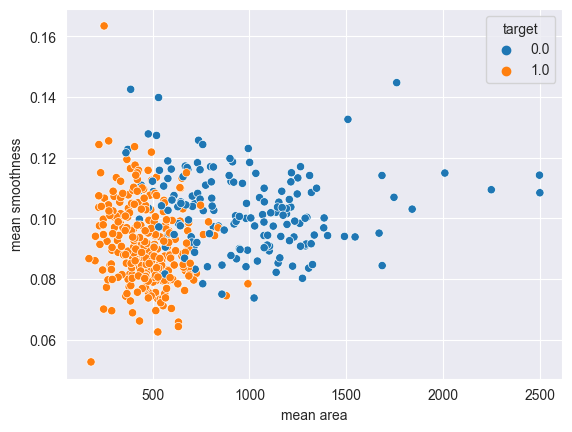

In [22]:
sns.scatterplot(x=X_train['mean area'], y= X_train['mean smoothness'], hue= y_train)

<Axes: xlabel='mean area', ylabel='mean smoothness'>

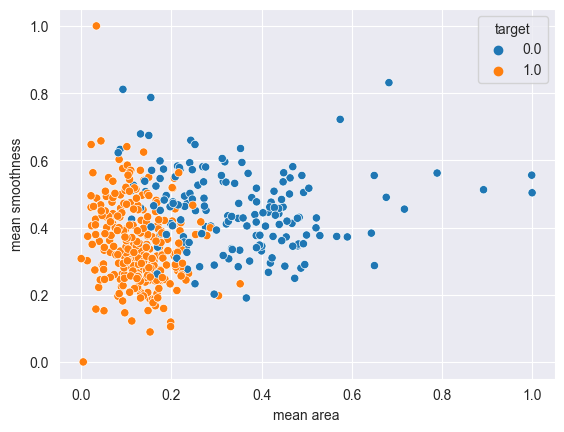

In [23]:
sns.scatterplot(x=x_train_Scaled['mean area'], y= x_train_Scaled['mean smoothness'], hue= y_train)

Prediction with Scaled dataset

In [24]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
x_test_Scaled = (X_test - min_test)/range_test
SVC_model.fit(x_train_Scaled, y_train)
y_predict = SVC_model.predict(x_test_Scaled)

Confusion Matrix on Scaled dataset

<Axes: >

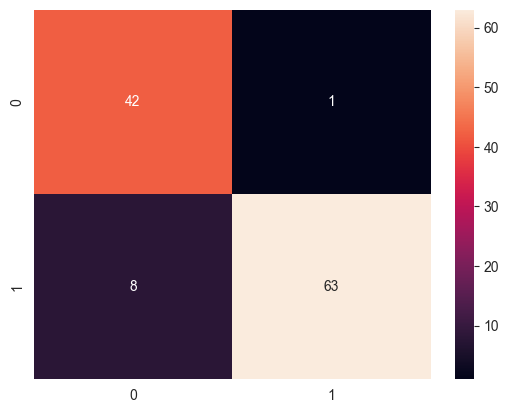

In [25]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [28]:
param_grid = {'C': [0.1, 1, 10, 100],
            'gamma':[1, 0.1, 0.01, 0.001],
            'kernel': ['rbf'] }
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose = 4)
grid.fit(x_train_Scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

[[42  1]
 [ 8 63]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90        43
         1.0       0.98      0.89      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



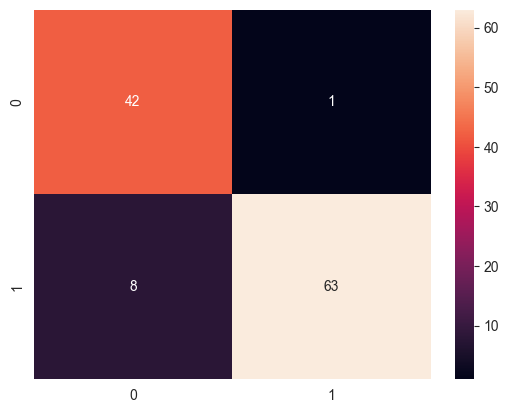

In [29]:
grid.best_params_
grid_prediction = grid.predict(x_test_Scaled)
cm = confusion_matrix(y_test, grid_prediction)
sns.heatmap(cm, annot=True)
print(cm)
print(classification_report(y_test, grid_prediction))

SUMMARY OF THE PREDICTION

Our prediction got a lot better with only 1 false prediction(Predicted cancer instead of healthy). We achieved 98% accuracy!

Training an SVM model to make accurate breast cancer classifications, improving the performance of an SVM model, and testing model accuracy using Confusion Matrix.